# Feature Selection

## Playground

In [1]:
from sklearn.feature_selection import VarianceThreshold
import pickle

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

In [2]:
print(ribociclib_data.head())

                  LN_IC50    CELLLINE    TSPAN6      TNMD      DPM1     SCYL3  \
SANGER_MODEL_ID                                                                 
SIDM00872        4.254618  ACH-000859  5.296090  0.000000  6.794416  3.452859   
SIDM00866        3.583018  ACH-000374  5.214125  0.000000  6.328047  3.168321   
SIDM00885        4.023289  ACH-000111  5.241840  0.201634  5.615299  3.090853   
SIDM00884        3.146215  ACH-000699  3.481557  0.000000  7.070389  2.341986   
SIDM00877        6.135124  ACH-000196  4.349082  0.000000  6.479942  2.790772   

                 C1orf112       FGR       CFH     FUCA2  ...      H3C2  \
SANGER_MODEL_ID                                          ...             
SIDM00872        5.260778  0.042644  4.339137  5.833143  ...  1.827819   
SIDM00866        4.654206  0.042644  0.432959  6.574102  ...  0.000000   
SIDM00885        3.732269  0.084064  0.111031  4.026800  ...  0.632268   
SIDM00884        3.679199  0.176323  3.420887  5.854494  ...  

In [3]:
# extract the feature data from the joined dataset

feature_data = ribociclib_data.drop(columns=['LN_IC50'])
feature_data.drop(columns=['CELLLINE'], inplace=True)

# extract the label data from the joined dataset

label_data = ribociclib_data['LN_IC50']

In [4]:
# extract feature data index and column names

row_index = feature_data.index

print(row_index[0])

col_index = feature_data.columns

print(col_index[0])

SIDM00872
TSPAN6


In [5]:
# convert feature data and label data to numpy array

features_np = feature_data.to_numpy()
labels_np = label_data.to_numpy()

In [6]:
# create a VarianceThreshold object

varSel = VarianceThreshold(threshold=0)

# fit the VarianceThreshold object to the feature data

varSel.fit(features_np)

# print the number of features that have a variance greater than 0

print('Number of features with a variance greater than 0: ', varSel.get_support().sum())

# print the names of the features that have a variance greater than 0

print('Features with a variance greater than 0: ', col_index[varSel.get_support()])

Number of features with a variance greater than 0:  18992
Features with a variance greater than 0:  Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'H3C2', 'H3C3', 'AC098582.1', 'DUS4L-BCAP29', 'C8orf44-SGK3', 'ELOA3B',
       'NPBWR1', 'ELOA3D', 'ELOA3', 'CDR1'],
      dtype='object', length=18992)


In [7]:
# Use MRMR and RFE to select features for the ribociclib dataset 

In [6]:
import pymrmr 

In [16]:
# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd

# generate a random dataset

X, y = make_classification(n_samples=1000, n_features=1000, n_informative=150, n_redundant=500, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

# print the shape of the feature data

print(X.shape, y.shape)

# convert X into pandas dataframe

df = pd.DataFrame(X)

# convert all the columns of X into string type

df.columns = df.columns.astype(str)

(1000, 1000) (1000,)


In [17]:
mrmr_fn = 100 

# use MRMR to select the top 100 features

mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_fn)

# print the selected features

print(mrmr_features)

Features Count: 10, Time Taken: 0.4727134704589844, Sample Size: 1000, Feature Size: 100
Features Count: 11, Time Taken: 0.5499444007873535, Sample Size: 1000, Feature Size: 100
Features Count: 12, Time Taken: 0.6427302360534668, Sample Size: 1000, Feature Size: 100
Features Count: 13, Time Taken: 0.739145040512085, Sample Size: 1000, Feature Size: 100
Features Count: 14, Time Taken: 0.8765039443969727, Sample Size: 1000, Feature Size: 100
Features Count: 15, Time Taken: 0.9761753082275391, Sample Size: 1000, Feature Size: 100
Features Count: 16, Time Taken: 1.0809528827667236, Sample Size: 1000, Feature Size: 100
Features Count: 17, Time Taken: 1.222367763519287, Sample Size: 1000, Feature Size: 100
Features Count: 18, Time Taken: 1.329857349395752, Sample Size: 1000, Feature Size: 100
Features Count: 19, Time Taken: 1.4787063598632812, Sample Size: 1000, Feature Size: 100
Features Count: 20, Time Taken: 1.6409060955047607, Sample Size: 1000, Feature Size: 100
Features Count: 21, Time

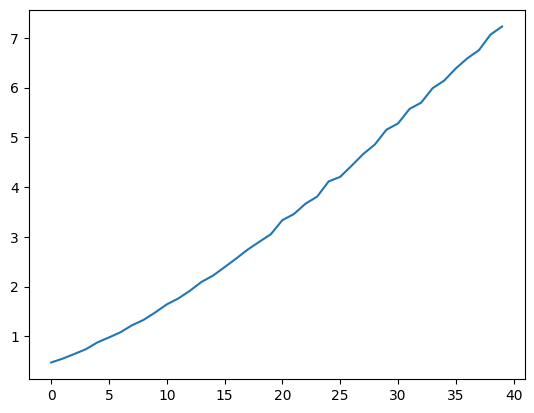

In [1]:
import time 

# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd
import pymrmr 

n_samples = 1000
n_features = 100
n_informative = int(n_features * 0.15)
n_redundant = int(n_features * 0.5)
n_repeated = int(n_features * 0.1)
mrmr_features = 10 

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_informative=n_informative, 
                           n_redundant=n_redundant, 
                           n_repeated=n_repeated, 
                           n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

df = pd.DataFrame(X)
# convert all the columns of X into string type
df.columns = df.columns.astype(str)

def measure_time(X, mrmr_features):
    start_time = time.time()
    mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_features)
    end_time = time.time()
    return end_time - start_time

# print the time taken to select the top 100 features using MRMR

# print(f'Time taken to select the top {mrmr_features} features using MRMR: ', measure_time(X, mrmr_features))

time_taken = []

i = 10 
max_sel = int(n_features/2) if int(n_features/2) else 100
while i < max_sel:
    t = measure_time(X, i)
    time_taken.append(t)
    print(f'Features Count: {i}, Time Taken: {t}, Sample Size: {n_samples}, Feature Size: {n_features}')
    i += 1 

import matplotlib.pyplot as plt 

plt.plot(time_taken)


In [12]:
import time 

# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd
import pymrmr 


def measure_time(mrmr_features, n_features):
    n_samples = 1000
    n_informative = int(n_features * 0.15)
    n_redundant = int(n_features * 0.5)
    n_repeated = int(n_features * 0.1)
    mrmr_features = 10 

    X, y = make_classification(n_samples=n_samples, 
                            n_features=n_features, 
                            n_informative=n_informative, 
                            n_redundant=n_redundant, 
                            n_repeated=n_repeated, 
                            n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    df = pd.DataFrame(X)
    # convert all the columns of X into string type
    df.columns = df.columns.astype(str)
    start_time = time.time()
    mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_features)
    end_time = time.time()
    return end_time - start_time

# print the time taken to select the top 100 features using MRMR

# print(f'Time taken to select the top {mrmr_features} features using MRMR: ', measure_time(X, mrmr_features))

time_taken = []

i = 20
max_sel = 2000
while i < max_sel:
    t = measure_time(10, i)
    time_taken.append(t)
    print(f'Features Count: 10, Time Taken: {t}, Feature Size: {i}')
    i = i * 2




Features Count: 10, Time Taken: 0.0469965934753418, Feature Size: 20
Features Count: 10, Time Taken: 0.14049172401428223, Feature Size: 40
Features Count: 10, Time Taken: 0.36102771759033203, Feature Size: 80
Features Count: 10, Time Taken: 0.8814668655395508, Feature Size: 160
Features Count: 10, Time Taken: 2.2891926765441895, Feature Size: 320
Features Count: 10, Time Taken: 7.556275129318237, Feature Size: 640
Features Count: 10, Time Taken: 60.10821747779846, Feature Size: 1280


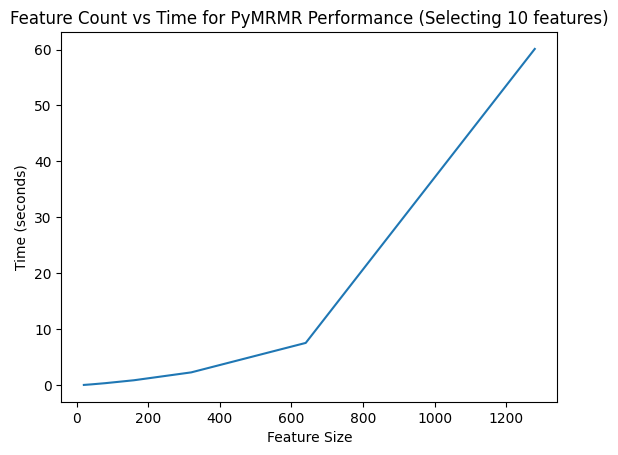

In [14]:
import matplotlib.pyplot as plt 

plt.title('Feature Count vs Time for PyMRMR Performance (Selecting 10 features)')
plt.xlabel('Feature Size')
plt.ylabel('Time (seconds)')
plt.plot([20,40,80,160,320,640,1280], time_taken)


In [8]:
# Use MRMR to select the top 10 features

mrmr_feature_number = 10

mrmr_features = pymrmr.mRMR(feature_data, 'MIQ', mrmr_feature_number)

# print the names of the features selected by MRMR

print('Features selected by MRMR: ', mrmr_features)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR

# import svm


# Use RFE to select the top 10 features

rfe_feature_number = 100

rfe_estimator = LinearSVR()
rfe_estimator.fit(features_np, labels_np)

rfe_selector = RFE(rfe_estimator, n_features_to_select=rfe_feature_number, step=1, verbose=1)

rfe_selector = rfe_selector.fit(features_np, labels_np)

# print the names of the features selected by RFE

print('Features selected by RFE: ', col_index[rfe_selector.support_])


Fitting estimator with 19221 features.
Fitting estimator with 19220 features.
Fitting estimator with 19219 features.
Fitting estimator with 19218 features.
Fitting estimator with 19217 features.
Fitting estimator with 19216 features.
Fitting estimator with 19215 features.
Fitting estimator with 19214 features.
Fitting estimator with 19213 features.
Fitting estimator with 19212 features.
Fitting estimator with 19211 features.
Fitting estimator with 19210 features.


KeyboardInterrupt: 

In [10]:
# refine the feature data using the features selected by MRMR and RFE

rfe_features = col_index[rfe_selector.support_]

# print(rfe_features)

# print(feature_data.shape)

selected_feature_data = feature_data[rfe_features]

In [24]:
# using both MRMR and RFE to select features 

import pymrmr 
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVR

# Use MRMR to select the top 100 features

mrmr_feature_number = 100

mrmr_features = pymrmr.mRMR(feature_data, 'MIQ', mrmr_feature_number)

mrmr_selected_feature_data = feature_data[mrmr_features]

print(mrmr_selected_feature_data.shape)

# Use RFE to select the top 10 features from MRMR features

rfe_feature_number = 10

rfe_estimator = LinearSVR()

rfe_selector = RFECV(rfe_estimator, n_features_to_select=rfe_feature_number, step=1, verbose=1, cv=5)

rfe_selector = rfe_selector.fit(mrmr_selected_feature_data, labels_np)

# print the names of the features selected by RFE

print('Features selected by RFE: ', feature_data[rfe_selector.support_])

# refine the feature data using the features selected by MRMR and RFE

rfe_features = feature_data[rfe_selector.support_]

In [25]:
# A quick prediction using the all features

# get prediction accuracy for the ribociclib dataset using the selected features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.2, random_state=42)

# create a LinearSVR object

svr = LinearRegression()

# fit the LinearSVR object to the training data

svr.fit(X_train, y_train)

# print the prediction accuracy for the training data via MSE 

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_train, svr.predict(X_train))

print('Linear Regression')
print(score)

# print the prediction accuracy for the testing data via MSE

score_test = mean_squared_error(y_test, svr.predict(X_test))

print(score_test)

# use linearsvr

# create a LinearSVR object

svr = LinearSVR()

# fit the LinearSVR object to the training data

svr.fit(X_train, y_train)

# print the prediction accuracy for the training data via MSE

score = mean_squared_error(y_train, svr.predict(X_train))

print('Linear SVR')

print(score)

# print the prediction accuracy for the testing data via MSE

score_test = mean_squared_error(y_test, svr.predict(X_test))

print(score_test)


Linear Regression
5.2064819744586776e-30
2.031417993992855
Linear SVR
8.599917311861061e-09
2.1188642277017404


Implementing GFFS (Greedy Forward Feature Selection) - A re-implementation in Python

In [9]:
# First apply filter based strategy, Shin et al 2023 used ANOVA based strategy for categorical label variables. 
# Here we are interested in numerical label variables, therefore we use Pearson's correlation coefficient 
# via f_regression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=100)
# apply feature selection
pearson_fs_feature = fs.fit_transform(feature_data, label_data)
print(pearson_fs_feature.shape)

scores, pval = fs.scores_, fs.pvalues_
support = fs.get_support(indices=True)

selected_scores, selected_pval = scores[support], pval[support]

# rank selected features by highest score

ranked_features = sorted(zip(selected_scores, selected_pval, support), reverse=True)

# selected features 

selected_feature_data = feature_data.iloc[:, support]

print(ranked_features)

(44, 100)
[(24.05328882360086, 1.4510926691883489e-05, 3720), (23.207173495967876, 1.9218499296052333e-05, 8182), (22.020571410849886, 2.869524981265973e-05, 6183), (19.75970754702939, 6.30428309160734e-05, 1368), (17.192091044386316, 0.00016045758767997323, 16792), (16.919628286532426, 0.0001776611882380663, 13848), (15.928446630034077, 0.0002585417473661678, 59), (15.160676990890257, 0.00034753994509188925, 18564), (15.142134563075588, 0.0003500521061085685, 11230), (14.981899368910724, 0.000372574805777905, 11563), (14.844940365354287, 0.0003930360335031469, 11092), (14.812841521347588, 0.0003980006530613084, 14748), (14.72834766256964, 0.00041138756011616567, 10752), (14.11271045584335, 0.0005244629661054665, 11308), (13.759096305091722, 0.0006038443858196778, 10604), (13.71697481533636, 0.0006141120521452957, 307), (13.58738927135404, 0.0006468710443885047, 12543), (13.402769352547756, 0.000696761984072569, 16881), (13.243065909941743, 0.0007431952038174727, 10627), (13.1629293099

In [24]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# test training with selected features using f_regression

score = cross_val_score(LinearSVR(), selected_feature_data, label_data, cv=5, scoring='neg_mean_squared_error')

print(score)
print(score.mean())

[-0.53654115 -1.4076112  -0.46994407 -1.07097609 -2.21852868]
-1.140720236579119


In [35]:
# perform greedy forward feature selection (GFFS) using the importance score (IS) of the features
# here, the importance score is the f-statistic of the feature

from sklearn.svm import LinearSVR
# from sklearn.feature_selection import SequentialFeatureSelector # SFS lacks verbosity and step-by-step outputs

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# disable warnings
import warnings
warnings.filterwarnings("ignore")

feature_selected = []
feature_selected.append(ranked_features[0][2])
# print(feature_selected)

selected_feature_data_gffs = feature_data.iloc[:,feature_selected]
model = LinearSVR()
score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()
max_num_features = 20 
successive_scores = []
successive_scores.append(score)

while len(feature_selected) < max_num_features:
    max_score = -10000
    max_feature = 0
    for i in range(len(ranked_features)):
        if ranked_features[i][2] not in feature_selected:
            feature_selected.append(ranked_features[i][2])
            selected_feature_data_gffs = feature_data.iloc[:,feature_selected]

            # cross validation 5 times and get average score

            score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()

            # model.fit(selected_feature_data_gffs, label_data)
            # score = mean_squared_error(label_data, model.predict(selected_feature_data_gffs))
            if score > max_score:
                max_score = score
                max_feature = ranked_features[i][2]
            feature_selected.pop()
    feature_selected.append(max_feature)
    successive_scores.append(max_score)
    print(f'Feature Selected: {max_feature}, Score: {max_score}, Feature Size: {len(feature_selected)}')


Feature Selected: 18955, Score: -0.5116145640700005, Feature Size: 2
Feature Selected: 8850, Score: -0.3717605435694349, Feature Size: 3
Feature Selected: 17831, Score: -0.3536559215228895, Feature Size: 4
Feature Selected: 1368, Score: -0.32293242559570867, Feature Size: 5
Feature Selected: 12541, Score: -0.2809737962041899, Feature Size: 6
Feature Selected: 12650, Score: -0.24255841147646393, Feature Size: 7
Feature Selected: 4275, Score: -0.21196375307988888, Feature Size: 8
Feature Selected: 2806, Score: -0.18089071993594202, Feature Size: 9
Feature Selected: 14604, Score: -0.1665347755490518, Feature Size: 10
Feature Selected: 11086, Score: -0.162410954551306, Feature Size: 11
Feature Selected: 12610, Score: -0.1599146461641539, Feature Size: 12
Feature Selected: 10040, Score: -0.1506190672080162, Feature Size: 13
Feature Selected: 13882, Score: -0.14386895711419886, Feature Size: 14
Feature Selected: 10439, Score: -0.14413589055750803, Feature Size: 15
Feature Selected: 18443, Sc

In [36]:
# test the selected features with a final go through of cross validation

selected_feature_data_gffs = feature_data.iloc[:,feature_selected]

score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Final Score: {score}')

Final Score: -0.1133615759762208


In [43]:
# select feature names using col_index 

gffs_feature_names = feature_data.columns[feature_selected]

print(gffs_feature_names, feature_selected)
# print(col_index[3720]) # verify the feature name at index 3720

# make successive_scores positive

pos_successive_scores = [abs(x) for x in successive_scores]

Index(['FOLR3', 'TBC1D3I', 'GOLGA7', 'C1GALT1C1L', 'PAK3', 'B3GNT2', 'PSG6',
       'HEMK1', 'NOMO1', 'NLRP10', 'ELOVL7', 'SLC26A5', 'GPRASP2', 'OR2T8',
       'HCRT', 'ZNF345', 'PAX1', 'MTRNR2L10', 'ZSWIM3', 'PDK4'],
      dtype='object') [3720, 18955, 8850, 17831, 1368, 12541, 12650, 4275, 2806, 14604, 11086, 12610, 10040, 13882, 10439, 18443, 5642, 18564, 6561, 59]


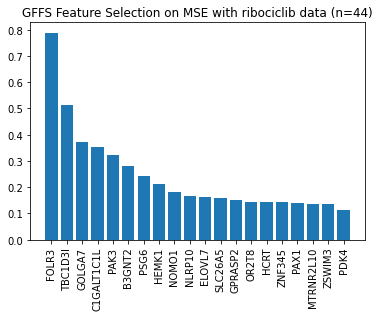

In [46]:
# create bar chart for the successive scores associated with gffs feature names 

import matplotlib.pyplot as plt

plt.bar(gffs_feature_names, pos_successive_scores)
plt.title('GFFS Feature Selection on MSE with ribociclib data (n=44)')
plt.xticks(rotation=90)
plt.show()


Implementing the MRMR (Minimum Redundancy Maximum Relevance) Algorithm 

MRMR does not conflict with the GFFS algorithm. It can even possibly complement GFFS by providing a more objective way of selecting features as a filtering step before GFFS.

In [6]:
# Code adapted from: 
# https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

import pandas as pd
from sklearn.feature_selection import f_regression


def mrmr(X, y, K, verbose=0):

    # inputs:
    #    X: pandas.DataFrame, features
    #    y: pandas.Series, target variable
    #    K: number of features to select

    # compute F-statistics and initialize correlation matrix
    F = pd.Series(f_regression(X, y)[0], index = X.columns)
    corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

    # initialize list of selected features and list of excluded features
    selected = []
    not_selected = X.columns.to_list()

    # repeat K times
    for i in range(K):
    
        # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
        if i > 0:
            last_selected = selected[-1]
            corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
            
        # compute FCQ score for all the (currently) excluded features (this is Formula 2)
        score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
        
        # find best feature, add it to selected and remove it from not_selected
        best = score.index[score.argmax()]
        selected.append(best)
        not_selected.remove(best)

        if verbose: 
            print('Iteration', i+1, 'selected', best, 'score', score.max(), 'remaining', len(not_selected), 'features')
    
    return selected

In [9]:
mrmr_selected_features = mrmr(feature_data, label_data, 20)

print(mrmr_selected_features)

mrmr_selected_features_index = [feature_data.columns.get_loc(c) for c in mrmr_selected_features]

print(mrmr_selected_features_index)

['FOLR3', 'KIAA1841', 'COX6A2', 'PGA5', 'L3MBTL2', 'PAK3', 'OR2T33', 'SYPL2', 'CACNG6', 'TBC1D3I', 'SLC8A1', 'UVRAG', 'PDK4', 'TMED10', 'CSNKA2IP', 'LRRTM3', 'CNGA1', 'VSTM2B', 'RNF180', 'CLEC17A']
[3720, 10684, 9874, 18589, 2274, 1368, 13848, 8182, 6183, 18955, 14748, 16691, 59, 12543, 19146, 16792, 16720, 15615, 11092, 15758]


In [15]:
from sklearn.svm import LinearSVR
# from sklearn.feature_selection import SequentialFeatureSelector # SFS lacks verbosity and step-by-step outputs

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings("ignore")

selected_feature_data_mrmr = feature_data.iloc[:,mrmr_selected_features_index]

model = LinearSVR()

score = cross_val_score(model, selected_feature_data_mrmr, label_data, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Final Score: {score}')

Final Score: -0.4198638896503953


### Nested Cross-validation for when wrapper methods are used 

## Streamline